c:\Users\Eslam Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

--------------------------------------------------
=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.67      0.79      0.72        28

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.73      0.72      0.72        61

--------------------------------------------------
=== Random Forest ===
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accu

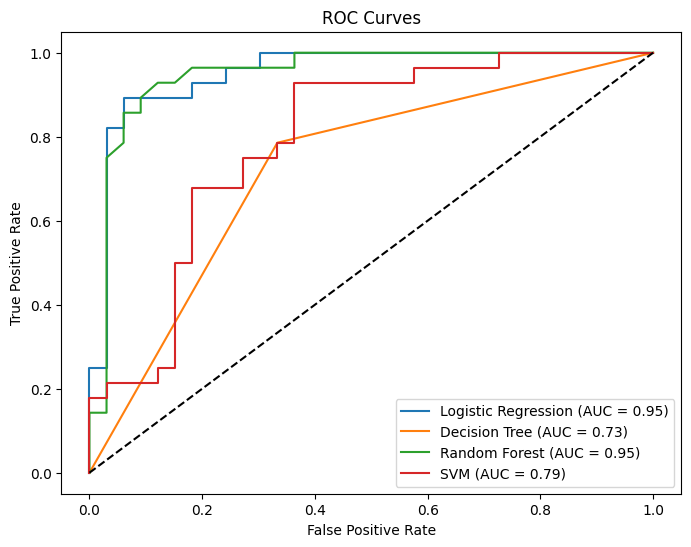

,Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.868852,0.812500,0.928571,0.866667,0.952381
Decision Tree,0.721311,0.666667,0.785714,0.721311,0.726190
Random Forest,0.885246,0.838710,0.928571,0.881356,0.949675
SVM,0.688525,0.714286,0.535714,0.612245,0.794372


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_csv("../data/heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train , X_test ,y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


# TRAIN MODELS
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]


    if name == "Random Forest":
       import joblib
       joblib.dump(model, "../models/final_model.pkl")

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    }
    
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("-"*50)


# ROC CURVES
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

results_df = pd.DataFrame(results).T
results_df.to_csv("../result/evaluation_metrics.txt", sep="\t")
results_df
